In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from sklearn.utils import shuffle
import json

import itertools
import math
from collections import defaultdict
import string


# Business Data Exploratory Analysis

In [3]:
path = "./yelp_academic_dataset_business.json"

def parseData():
    # extract fields from business json data set #
    # setup an array for storing each json entry
    dataset = []

    # open the business source file
    f = open(path, 'r', encoding = 'utf8')

    for l in f:
        dataset.append(json.loads(l))
    f.close()
    return dataset

business_data = parseData()


In [5]:
# load business data into pandas dataframe and filter selected columns
header_keep = ['business_id', 'name', 'city', 'state', 'review_count', 'stars', 'categories']
business_df = pd.DataFrame(business_data, columns=header_keep)
business_df.head(10)

,business_id,name,city,state,review_count,stars,categories
0,Apn5Q_b6Nz61Tq4XzPdf9A,Minhas Micro Brewery,Calgary,AB,24,4.0,"Tours, Breweries, Pizza, Restaurants, Food, Ho..."
1,AjEbIBw6ZFfln7ePHha9PA,CK'S BBQ & Catering,Henderson,NV,3,4.5,"Chicken Wings, Burgers, Caterers, Street Vendo..."
2,O8S5hYJ1SMc8fA4QBtVujA,La Bastringue,Montréal,QC,5,4.0,"Breakfast & Brunch, Restaurants, French, Sandw..."
3,bFzdJJ3wp3PZssNEsyU23g,Geico Insurance,Phoenix,AZ,8,1.5,"Insurance, Financial Services"
4,8USyCYqpScwiNEb58Bt6CA,Action Engine,Calgary,AB,4,2.0,"Home & Garden, Nurseries & Gardening, Shopping..."
5,45bWSZtniwPRiqlivpS8Og,The Coffee Bean & Tea Leaf,Phoenix,AZ,63,4.0,"Coffee & Tea, Food"
6,9A2quhZLyWk0akUetBd8hQ,Bnc Cake House,Toronto,ON,7,4.0,"Food, Bakeries"
7,6OuOZAok8ikONMS_T3EzXg,Thai One On,Mississauga,ON,7,2.0,"Restaurants, Thai"
8,8-NRKkPY1UiFXW20WXKiXg,Filiberto's Mexican Food,Avondale,AZ,40,2.5,"Mexican, Restaurants"
9,UTm5QZThPQlT35mkAcGOjg,Maggie & Stella's Gifts,Pittsburgh,PA,3,3.5,"Flowers & Gifts, Gift Shops, Shopping"


In [11]:
business_df['review_count'].mean() # print average review length
business_df['stars'].mean() # print average review rating

3.6315504817251965

In [18]:
USA = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", \
       "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", "MA", \
       "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY", \
       "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", "SD", "TN", "TX", \
       "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

# filter out reviews not in USA
business_df = business_df[business_df['state'].isin(USA)]
len(business_df) # total number of reviews in USA


139183

In [19]:
categories = business_df.groupby(by='categories').sum() # sort by categories
cat_set = list(business_df['categories'])

business_df = business_df[business_df['categories'].str.contains("Restaurants")==True]

In [20]:
business_df.head(5)

,business_id,name,city,state,review_count,stars,categories
1,AjEbIBw6ZFfln7ePHha9PA,CK'S BBQ & Catering,Henderson,NV,3,4.5,"Chicken Wings, Burgers, Caterers, Street Vendo..."
8,8-NRKkPY1UiFXW20WXKiXg,Filiberto's Mexican Food,Avondale,AZ,40,2.5,"Mexican, Restaurants"
12,_c3ixq9jYKxhLUB0czi0ug,Original Hamburger Works,Phoenix,AZ,277,4.0,"Bars, Sports Bars, Dive Bars, Burgers, Nightli..."
19,vJIuDBdu01vCA8y1fwR1OQ,CakesbyToi,Las Vegas,NV,3,1.5,"American (Traditional), Food, Bakeries, Restau..."
21,gJ5xSt6147gkcZ9Es0WxlA,Rally's Hamburgers,Cleveland,OH,5,3.0,"Fast Food, Burgers, Restaurants"


In [52]:
state = business_df.groupby('state').sum()
# print(business_df.loc[[1592]]) # prints out specific entry in table located by index 1592
state

,review_count,stars
state,,
AZ,1048547,37883.0
CA,4,4.5
CO,285,98.0
FL,17,4.0
IL,26084,2201.0
IN,1014,231.5
MO,8,8.0
NC,236408,14139.5
NV,1183116,25711.5


Num of Businesses (in Dataset) = 188593

Num of Categories = 85056

Num of Business (US only) = 139183

Num of Restaurant Business = 34189

Num of Users (in Dataset) = 1518169 

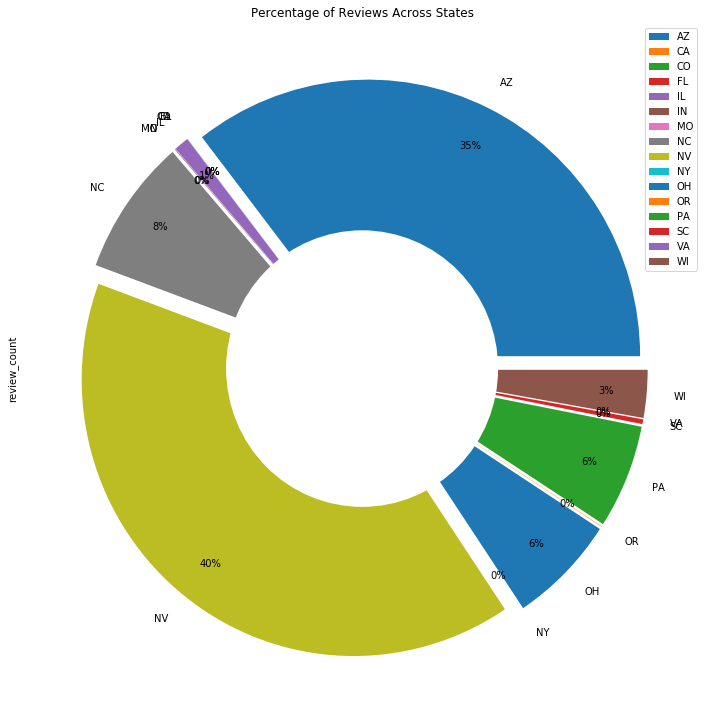

In [74]:
state = business_df.groupby(by='state').sum()
explode = (0.05, 0.05, 0.05, 0.05, \
           0.05, 0.05, 0.05, 0.05, \
           0.05, 0.05, 0.05, 0.05, \
           0.05, 0.05, 0.05, 0.05)

state.plot.pie(y='review_count', figsize=(10, 10), autopct='%1.00f%%',pctdistance=0.85, explode=explode)
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.title('Percentage of Reviews Across States')
plt.savefig('reviews_state.png')

 

In [206]:
rest = business_df.groupby(['state']).apply(lambda x: (x.groupby('city') \
                                      .sum().sort_values('review_count', ascending=False).head(5)))


In [207]:
rest # display sorted list of cities with most reviews for each state


review_count    stars
state city                                           
AZ    Phoenix                         375385  13110.0
      Scottsdale                      201991   5457.5
      Tempe                           104186   3395.0
      Mesa                             80077   3824.0
      Chandler                         76876   2900.5
CA    Montreal                             4      4.5
CO    Bellagio                           214     71.5
      Clark                               64     19.5
      Main Street                          7      7.0
FL    Turks and Caicos Islands            17      4.0
IL    Champaign                        19229   1332.5
      Urbana                            5227    426.0
      Savoy                              351     47.5
      Mahomet                            312     81.5
      Rantoul                            284     89.0
IN    Madison                            971    205.0
      Argos                               30     15.0
      Monroeville                         13     11.5
MO    The Quay                             8      8.0
NC    Charlotte                       180962   8755.0
      Concord                           9886    963.0
      Matthews                          8582    673.0
      Huntersville                      8365    495.5
      Cornelius                         4817    362.0
NV    Las Vegas                      1053115  21377.0
      Henderson                        97949   2905.0
      North Las Vegas                  22039   1078.0
      Boulder City                      5411    204.5
      Spring Valley                     1279     17.5
NY    Rouses Point                        55     18.0
      Champlain                           16     11.5
      Churubusco                           9      4.5
      Mooers                               7      5.0
OH    Cleveland                        71925   4922.0
      Lakewood                         12001    622.0
      Cleveland Heights                 5441    249.0
      Westlake                          5218    424.0
      Strongsville                      4414    397.0
OR    Phoenix                            762    110.0
      Walton                              24      8.5
PA    Pittsburgh                      141873   8115.5
      Monroeville                       3633    402.5
      Homestead                         2299    117.5
      Bridgeville                       2126    200.5
      Wexford                           2108    200.5
SC    Fort Mill                         6136    587.5
      Lake Wylie                         693     49.5
      Tega Cay                           671     48.0
      Indian Land                        597     70.5
      Ft. Mill                            69      2.0
VA    Henderson                            3      4.0
WI    Madison                          65668   3753.0
      Middleton                         5323    386.5
      Fitchburg                         2614    202.5
      Sun Prairie                       2335    251.0
      Monona                            1513    171.0

In [270]:
# choose Las Vegas and Phoenix business since they have the most data
lasvegas_df = business_df[business_df['city']=='Las Vegas']
lasvegas_df = lasvegas_df[lasvegas_df['review_count'] > 20]

phoenix_df = business_df[business_df['city']=='Phoenix']
phoenix_df = phoenix_df[phoenix_df['review_count'] > 20]
phoenix_df.head(5)



,business_id,name,city,state,review_count,stars,categories
12,_c3ixq9jYKxhLUB0czi0ug,Original Hamburger Works,Phoenix,AZ,277,4.0,"Bars, Sports Bars, Dive Bars, Burgers, Nightli..."
47,cKRMmytHxaSt8F0SMEzKqg,Manuel's Mexican Restaurant & Cantina - Bell Rd,Phoenix,AZ,230,3.5,"Event Planning & Services, Soup, Salad, Mexica..."
187,8vA1d9_w4hBjOcrM7mNWFg,Boston Market,Phoenix,AZ,28,3.5,"American (Traditional), Comfort Food, Barbeque..."
302,sh69ApUyPhAltAMpv5vX3w,Barrio Cafe Gran Reserva,Phoenix,AZ,117,4.5,"Mexican, Restaurants"
476,wcNvlrB5xSxzXex2M3UyvQ,Hazelwoods First Place Sports Grill,Phoenix,AZ,116,3.0,"Nightlife, Sports Bars, Bars, Restaurants, Kar..."


In [294]:
categories = lasvegas_df['review_count'].sum()
categories



1035373

In [284]:
lasvegas = list(lasvegas_df['business_id'])
phoenix = list(phoenix_df['business_id'])
lasvegasID = defaultdict(int)
phoenixID = defaultdict(int)

lasvegasID = lasvegas_df.set_index('business_id')['stars'].to_dict()
phoenixID = phoenix_df.set_index('business_id')['stars'].to_dict()


# User Data Exploratory Analysis

In [208]:
path = "./yelp_academic_dataset_user.json"

def parseData():
    # extract fields from business json data set #
    # setup an array for storing each json entry
    dataset = []

    # open the user source file
    f = open(path, 'r', encoding = 'utf8')

    for l in f:
        dataset.append(json.loads(l))
    f.close()
    return dataset

user_data = parseData()



In [214]:
header_keep = ['user_id', 'name', 'review_count', 'average_stars', 'elite']
user_df = pd.DataFrame(user_data, columns = header_keep)
user_df.head(5)



,user_id,name,review_count,average_stars,elite
0,lzlZwIpuSWXEnNS91wxjHw,Susan,1,2.00,None
1,XvLBr-9smbI0m_a7dXtB7w,Daipayan,2,5.00,None
2,QPT4Ud4H5sJVr68yXhoWFw,Andy,1,4.00,None
3,i5YitlHZpf0B3R0s_8NVuw,Jonathan,19,4.05,None
4,s4FoIXE_LSGviTHBe8dmcg,Shashank,3,3.00,None


In [296]:
user_df = user_df[user_df['review_count'] > 20]
user_df.head(5)


,user_id,name,review_count,average_stars,elite
74,rMkz1mjevjl8xqrypZwHzw,Daniel,84,3.75,None
95,mN1eee0_j-dglmm57NAf3w,j,163,3.76,None
103,68qmfoSUXpPUaXz_VEyqzA,Mary,32,3.54,None
195,ZQ8ZXepUHhT-RB-THcCzEw,M,85,3.26,None
234,8C5396Ory3qaO-5Lsix_CQ,jason,25,3.68,None


In [295]:
len(user_df)
# user = list(user_df['user_id'])
# userID = defaultdict(int)
# userID = user_df.set_index('user_id')['average_stars'].to_dict()

300103

# Saving filtered data into pickle files

In [291]:
# Save User IDs and Business IDs for Las Vegas and Phoenix Restaurants
import pickle

file = open('business_user_IDs.pkl','wb')
pickle.dump(lasvegasID, file)
pickle.dump(lasvegas, file)
pickle.dump(phoenixID, file)
pickle.dump(phoenix, file)
pickle.dump(userID, file)
pickle.dump(user, file)

file.close()

